In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
dirty_train_data = pd.read_csv('train.csv')
dirty_test_data = pd.read_csv('test.csv')
train_data = dirty_train_data.dropna() ## To clear the null rows
test_data = dirty_test_data.dropna() ## To clear the null rows

In [7]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [8]:
test_data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [98]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB


In [9]:
train_data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


In [10]:
test_data.describe()

,x,y
count,300.000000,300.000000
mean,50.936667,51.205051
std,28.504286,29.071481
min,0.000000,-3.467884
25%,27.000000,25.676502
50%,53.000000,52.170557
75%,73.000000,74.303007
max,100.000000,105.591837


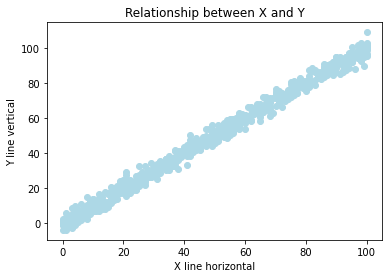

In [100]:
plt.title('Relationship between X and Y')
plt.xlabel('X line horizontal')
plt.ylabel('Y line vertical')
plt.scatter(train_data['x'], train_data['y'],  color='lightblue')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x222076e7c08>,
 'caps': [<matplotlib.lines.Line2D at 0x222076fdb08>,
 'boxes': [<matplotlib.lines.Line2D at 0x222076faa08>],
 'medians': [<matplotlib.lines.Line2D at 0x222076fdd88>],
 'fliers': [<matplotlib.lines.Line2D at 0x22207704c08>],
 'means': []}

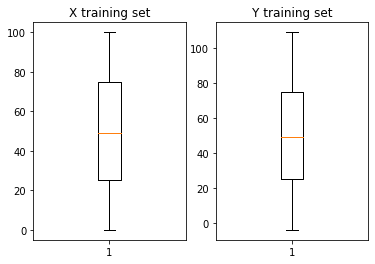

In [118]:
plt.subplot(1, 2, 1)
plt.title('X training set')
plt.boxplot(train_data['x'])

plt.subplot(1, 2, 2)
plt.title('Y training set')
plt.boxplot(train_data['y'])



(array([63., 66., 81., 65., 76., 86., 51., 65., 63., 83.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

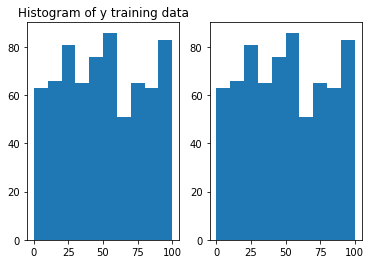

In [23]:
plt.title('Histogram of x training data')
plt.subplot(1, 2, 1)
plt.hist(train_data['x'])

plt.title('Histogram of y training data')
plt.subplot(1, 2, 2)
plt.hist(train_data['x'])

In [ ]:
#The data isn't normal and there doesn't seem to be any outliers to worry about.


In [131]:
# Now to set up the linear regression model
# Create linear regression object
## 1st Method by using sklearn.linear_model Linear Regression
from scipy import stats as st # and some stats
import math

lm = LinearRegression()
# ... then fir it
lm.fit(train_data[['x']],train_data[['y']])
y_predict = lm.predict(test_data[['x']])
print("Z- Score: ",lm.score(train_data[['x']],train_data[['y']]))
print('Correlation: ', math.sqrt(lm.score(train_data[['x']],train_data[['y']])))
print("Coefficient for X ", lm.coef_)

print ("Standard Error: ",st.sem(train_data[['x']]))


Z- Score:  0.9907015319025518
Correlation:  0.9953399077212527
Coefficient for X  [[1.00065638]]
Standard Error:  [1.09516205]


In [67]:
## Simple Linear Regression By statsmodels.api as sm OLS
import statsmodels.api as sm
X = train_data['x']
Y = train_data['y']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 7.426e+04
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        19:30:19   Log-Likelihood:                -1712.8
No. Observations:                 699   AIC:                             3430.
Df Residuals:                     697   BIC:                             3439.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1073      0.212     -0.506      0.6

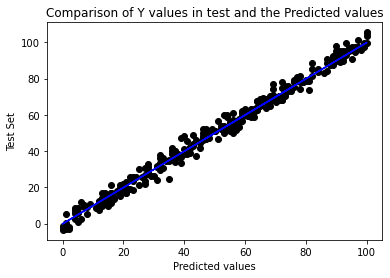

In [141]:
y_predict = lm.predict(test_data[['x']])

plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(test_data[['x']], test_data[['y']],  color='black')
plt.plot(test_data[['x']],y_predict, color = 'blue')
plt.show()


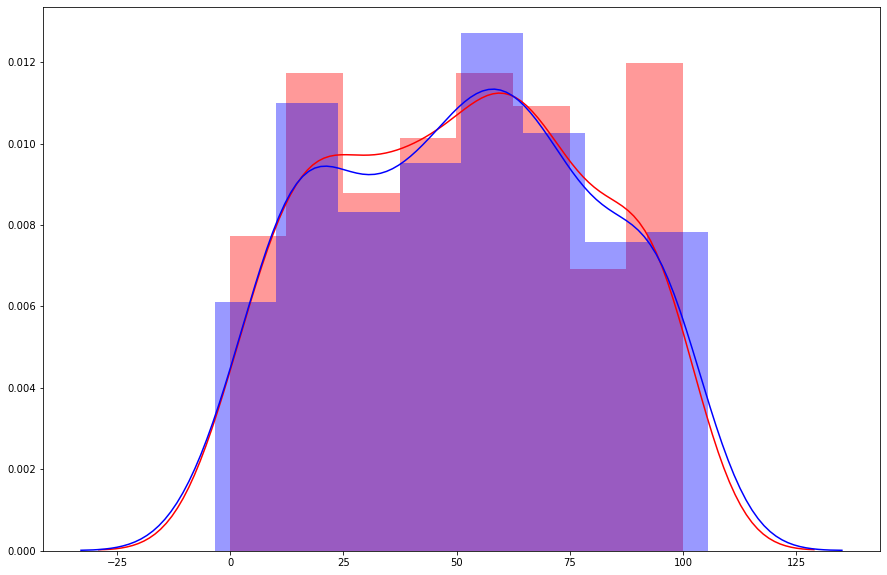

In [142]:
import seaborn as seabornInstance 
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y_predict,color="red") ## Predicted Data
seabornInstance.distplot(test_data[['y']],color="blue") ## Actual Data


In [152]:
Actual = test_data[['y']].values
df = pd.DataFrame({'Actual': Actual.flatten(), 'Predicted': y_predict.flatten()})
df
df.describe()

,Actual,Predicted
count,300.000000,300.000000
mean,51.205051,50.862835
std,29.071481,28.522995
min,-3.467884,-0.107265
25%,25.676502,26.910457
50%,52.170557,52.927523
75%,74.303007,72.940650
max,105.591837,99.958373


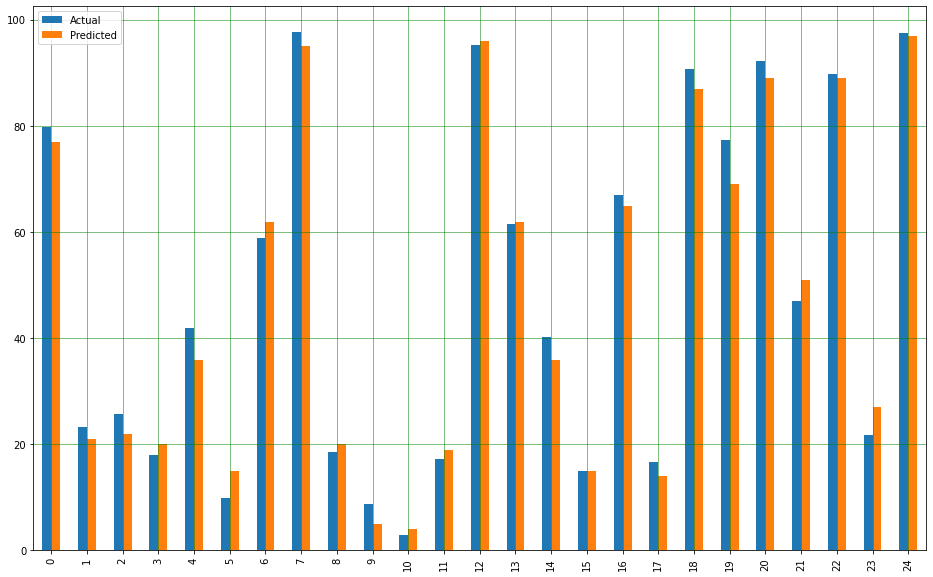

In [153]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
